# Analyse temperature distributions arising from infilled data


In [1]:
import numpy as np
import pandas as pd
import pyam
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


Load the data that has been run by the climate assessment pipeline

In [3]:
folder = "../../iiasa-climate-assessement/output/fixed_output/"
all_data = pyam.IamDataFrame(folder + "allvar_sr15_mscen_alloutput.xlsx")
infilled_qrw = pyam.IamDataFrame(folder + "allvar_co2_only_sr15_mscen_alloutput.xlsx")
infilled_eqw = pyam.IamDataFrame(folder + "allvar_co2_only_sr15_mscen_EQW_alloutput.xlsx")
infilled_ch4_qrw = pyam.IamDataFrame(folder + "allvar_co2ch4_only_sr15_mscen_alloutput.xlsx")
#infilled_ch4_eqw = pyam.IamDataFrame(folder + "allvar_co2ch4_only_sr15_mscen_EQW_alloutput.xlsx")

pyam.core - INFO: Reading file `../../iiasa-climate-assessement/output/fixed_output/allvar_sr15_mscen_alloutput.xlsx`
pyam.core - INFO: Importing meta indicators for 47 scenarios (for total of 47)
pyam.core - INFO: Reading file `../../iiasa-climate-assessement/output/fixed_output/allvar_co2_only_sr15_mscen_alloutput.xlsx`
pyam.core - INFO: Importing meta indicators for 47 scenarios (for total of 47)
pyam.core - INFO: Reading file `../../iiasa-climate-assessement/output/fixed_output/allvar_co2_only_sr15_mscen_EQW_alloutput.xlsx`
pyam.core - INFO: Importing meta indicators for 47 scenarios (for total of 47)


Combine them for analysis. Since there is a lot of data, we remove non-decadal years.

In [102]:
all_data.data["infill"] = "Original"
infilled_qrw.data["infill"] = "CO2 QRW"
infilled_eqw.data["infill"] = "CO2 EQW"
infilled_ch4_qrw["infill"] = "CO2 and CH4 QRW"
#infilled_ch4_eqw["infill"]  = "CO2 and CH4 EQW"
temp_comp = "AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.3.0|50.0th Percentile"
decades = range(2030, 2101, 10)
all_temp_infills = pd.concat(
    [
        infilled_qrw.filter(variable=temp_comp, year=decades).data,
        all_data.filter(variable=temp_comp, year=decades).data,
        infilled_eqw.filter(variable=temp_comp, year=decades).data,
        infilled_ch4_qrw.filter(variable=temp_comp, year=decades).data,
        #infilled_ch4_eqw.filter(variable=temp_comp, year=decades).data,
    ]
)

In [103]:
all_temp_infills

,model,scenario,region,variable,unit,year,value,infill
30065,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Surface Temperature (G...,K,2030,1.482731,CO2 QRW
30075,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Surface Temperature (G...,K,2040,1.552724,CO2 QRW
30085,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Surface Temperature (G...,K,2050,1.560031,CO2 QRW
30095,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Surface Temperature (G...,K,2060,1.526738,CO2 QRW
30105,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Surface Temperature (G...,K,2070,1.465186,CO2 QRW
...,...,...,...,...,...,...,...,...
1448109,REMIND-MAgPIE 1.7-3.0,SMP_REF_Sust,World,AR6 climate diagnostics|Surface Temperature (G...,K,2060,2.393896,CO2 and CH4 QRW
1448119,REMIND-MAgPIE 1.7-3.0,SMP_REF_Sust,World,AR6 climate diagnostics|Surface Temperature (G...,K,2070,2.744168,CO2 and CH4 QRW
1448129,REMIND-MAgPIE 1.7-3.0,SMP_REF_Sust,World,AR6 climate diagnostics|Surface Temperature (G...,K,2080,3.029515,CO2 and CH4 QRW
1448139,REMIND-MAgPIE 1.7-3.0,SMP_REF_Sust,World,AR6 climate diagnostics|Surface Temperature (G...,K,2090,3.297837,CO2 and CH4 QRW


In [104]:
all_temp_infills["year"].unique()

array([2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100], dtype=int64)

In [105]:
all_temp_infills["model"].unique()

array(['AIM/CGE 2.1', 'IMAGE 3.0.1', 'MESSAGEix-GLOBIOM 1.0',
       'REMIND 1.7', 'REMIND-MAgPIE 1.7-3.0'], dtype=object)

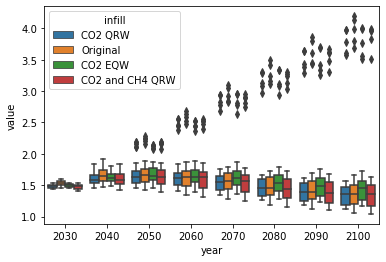

In [106]:
sns.boxplot(data=all_temp_infills, x="year", y="value", hue="infill")

In [107]:
temp_df = all_temp_infills.pivot(
    index=["model", "scenario", "year", "region", "unit", "variable"], columns="infill", values="value"
)

In [108]:
temp_df.describe()

infill,CO2 EQW,CO2 QRW,CO2 and CH4 QRW,Original
count,376.000000,376.000000,376.000000,376.000000
mean,1.656519,1.615629,1.606208,1.644085
std,0.443802,0.456888,0.477249,0.491407
min,1.172423,1.123390,1.042042,1.057164
25%,1.475939,1.446948,1.416854,1.448044
50%,1.561736,1.518748,1.511466,1.550038
75%,1.675862,1.628887,1.632337,1.668858
max,4.000446,3.977488,3.995386,4.193336


In [109]:
for ind in range(len(temp_df.columns)):
    print(
        "for {}, correlation is {}".format(
        temp_df.columns[ind], str(np.polyfit(temp_df["Original"], temp_df[temp_df.columns[ind]], 1))
        )
    )

for CO2 EQW, correlation is [0.89511998 0.18486624]
for CO2 QRW, correlation is [0.92408348 0.09635699]
for CO2 and CH4 QRW, correlation is [0.96544622 0.01893293]
for Original, correlation is [ 1.00000000e+00 -1.83217219e-16]


In [111]:
np.polyfit(temp_df["Original"], temp_df["CO2 QRW"], 1)

array([0.92408348, 0.09635699])

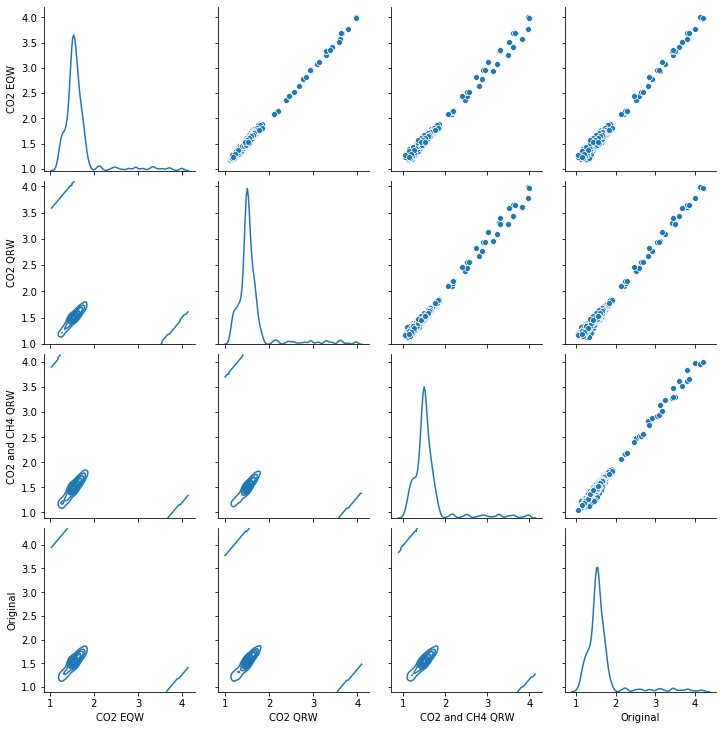

In [112]:
g = sns.PairGrid(temp_df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors="C0")
g.map_diag(sns.kdeplot)

In [125]:
dif = {}
for col in temp_df.columns:
    if str(col) != "Original":
        dif[col + " - Original"] = temp_df[col] - temp_df["Original"]

In [126]:
dif_df = pd.DataFrame(data=dif)
dif_df

CO2 EQW - Original  \
model                 scenario                          year region unit variable                                                                 
AIM/CGE 2.1           TERL_15D_LowCarbonTransportPolicy 2030 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.007186   
                                                        2040 World  K    AR6 climate diagnostics|Surface Temperature (GS...            0.074743   
                                                        2050 World  K    AR6 climate diagnostics|Surface Temperature (GS...            0.067616   
                                                        2060 World  K    AR6 climate diagnostics|Surface Temperature (GS...            0.091432   
                                                        2070 World  K    AR6 climate diagnostics|Surface Temperature (GS...            0.109581   
...                                                                                                                                         ...   
REMIND-MAgPIE 1.7-3.0 SMP_REF_Sust                      2060 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.029229   
                                                        2070 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.029642   
                                                        2080 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.038612   
                                                        2090 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.092488   
                                                        2100 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.170065   

                                                                                                                             CO2 QRW - Original  \
model                 scenario                          year region unit variable                                                                 
AIM/CGE 2.1           TERL_15D_LowCarbonTransportPolicy 2030 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.034239   
                                                        2040 World  K    AR6 climate diagnostics|Surface Temperature (GS...            0.010049   
                                                        2050 World  K    AR6 climate diagnostics|Surface Temperature (GS...            0.039898   
                                                        2060 World  K    AR6 climate diagnostics|Surface Temperature (GS...            0.063540   
                                                        2070 World  K    AR6 climate diagnostics|Surface Temperature (GS...            0.062686   
...                                                                                                                                         ...   
REMIND-MAgPIE 1.7-3.0 SMP_REF_Sust                      2060 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.013172   
                                                        2070 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.013703   
                                                        2080 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.028272   
                                                        2090 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.046012   
                                                        2100 World  K    AR6 climate diagnostics|Surface Temperature (GS...           -0.099317   

                                                                                                                             CO2 and CH4 QRW - Original  
model                 scenario                          year region unit variable                                                                  

In [127]:
dif_df.describe()

,CO2 EQW - Original,CO2 QRW - Original,CO2 and CH4 QRW - Original
count,376.000000,376.000000,376.000000
mean,0.012435,-0.028456,-0.037876
std,0.078310,0.062698,0.054535
min,-0.238131,-0.226982,-0.231706
25%,-0.037065,-0.055014,-0.068000
50%,0.018426,-0.031640,-0.025382
75%,0.059254,0.003269,-0.009915
max,0.238232,0.184775,0.097377


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000214C57D2BC8>,
      dtype=object)

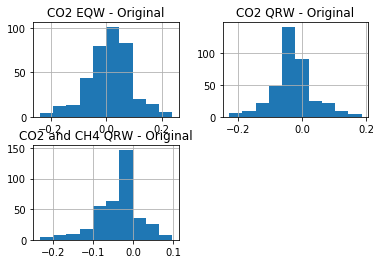

In [128]:
dif_df.hist()

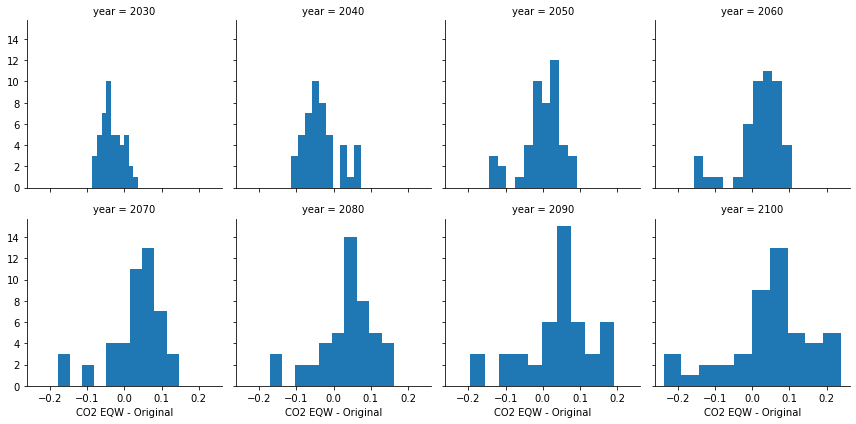

In [133]:
dif_df_full = dif_df[["CO2 EQW - Original", "CO2 QRW - Original", "CO2 and CH4 QRW - Original"]].reset_index()
g = sns.FacetGrid(dif_df_full, col="year", col_wrap=4)
g = g.map(plt.hist, "CO2 EQW - Original")

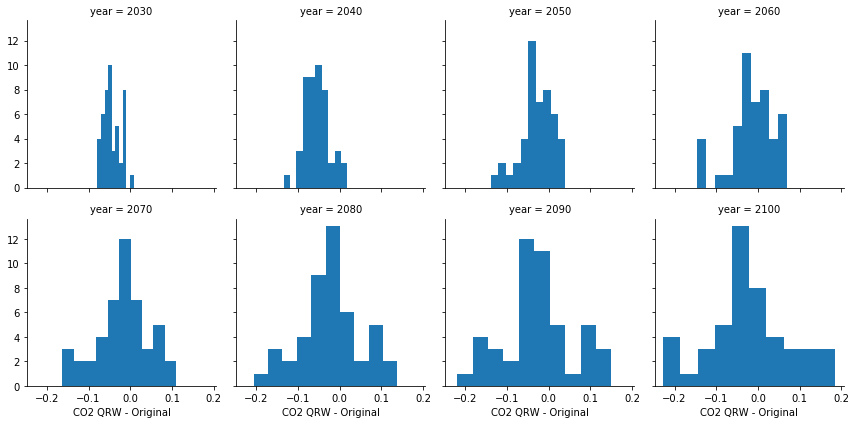

In [134]:
g = sns.FacetGrid(dif_df_full, col="year", col_wrap=4)
g = g.map(plt.hist, "CO2 QRW - Original")

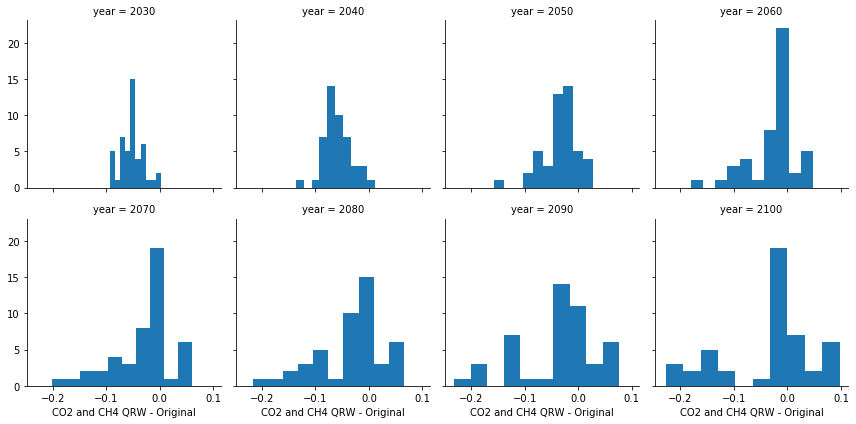

In [135]:
g = sns.FacetGrid(dif_df_full, col="year", col_wrap=4)
g = g.map(plt.hist, "CO2 and CH4 QRW - Original")

In [146]:
for col in dif_df.columns:
    rms_error = np.mean(dif_df_full[col] ** 2) ** 0.5
    print(col + " RMS error is {}".format(rms_error))

CO2 EQW - Original RMS error is 0.07918800939021736
CO2 QRW - Original RMS error is 0.06877762177485998
CO2 and CH4 QRW - Original RMS error is 0.06633866922944284


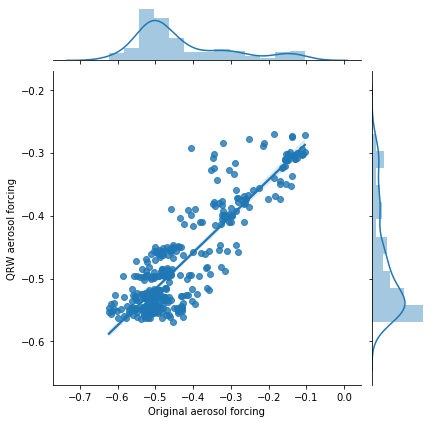

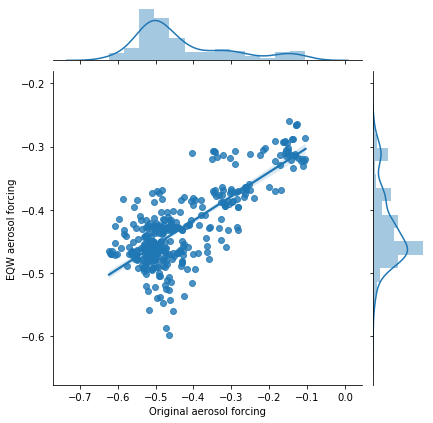

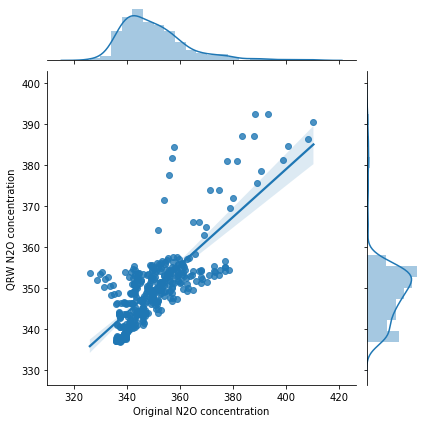

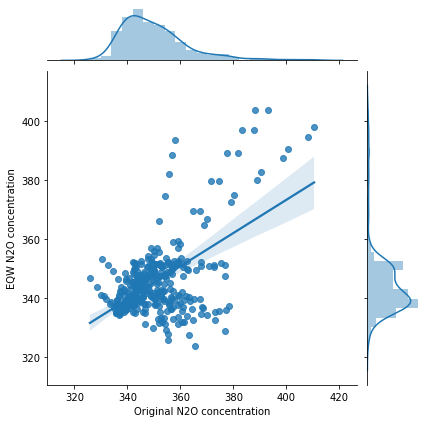

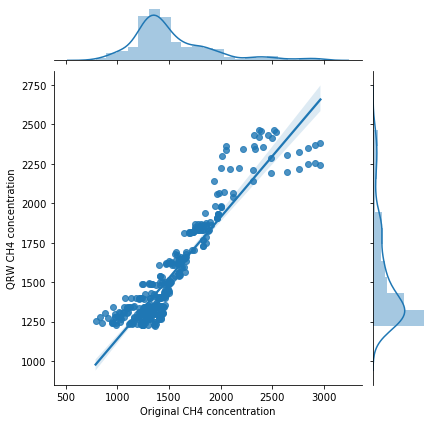

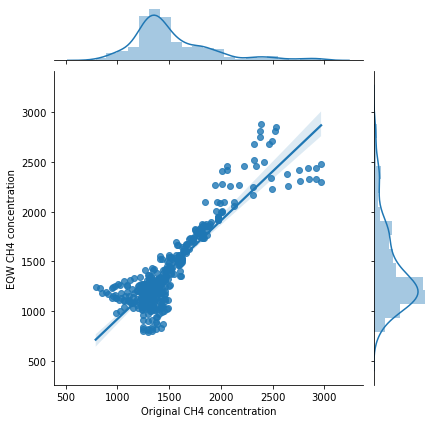

In [94]:
noninfill_cols = ['model', 'scenario', 'region', 'variable', 'unit', 'year']
to_plot_lst = [
    (" aerosol forcing", "AR6 climate diagnostics|Effective Radiative Forcing|Aerosols|Direct Effect|MAGICCv7.3.0|50.0th Percentile"),
    (" N2O concentration", "AR6 climate diagnostics|Atmospheric Concentrations|N2O|MAGICCv7.3.0|50.0th Percentile"),
    (" CH4 concentration", "AR6 climate diagnostics|Atmospheric Concentrations|CH4|MAGICCv7.3.0|50.0th Percentile"),
]
for aerforce, aerosols_effect in to_plot_lst:
    
    plot_filter = {"variable": aerosols_effect, "year": decades}
    to_plot_data = all_data.filter(**plot_filter).data.merge(
        infilled_qrw.filter(**plot_filter).data, on=noninfill_cols
    ).merge(
        infilled_eqw.filter(**plot_filter).data, on=noninfill_cols
    )
    
    sns.jointplot(x="value_x", y="value_y", data=to_plot_data, kind="reg").set_axis_labels("Original" + aerforce, "QRW" + aerforce)
    sns.jointplot(x="value_x", y="value", data=to_plot_data, kind="reg").set_axis_labels("Original" + aerforce, "EQW" + aerforce)
    print()

# Origin of differences
Now we consider the cause of this difference by comparing the emission values. Again, we don't need to consider the CO2 and CH4 case, as this will be identical to either the CO2 case or the original. 

In [225]:
# There is no need to consider CH4 infilling separately since it is identical to either the original or the infill all case
inf_comp = "*Infilled|Emissions*"
years = 2050
all_infilling = all_data.filter(variable=inf_comp, year=years).data.merge(
        infilled_qrw.filter(variable=inf_comp, year=years).data, on=noninfill_cols
).merge(infilled_eqw.filter(variable=inf_comp, year=years).data, on=noninfill_cols)

In [226]:
all_infilling

,model,scenario,region,variable,unit,year,value_x,infill_x,value_y,infill_y,value,infill
0,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Infilled|Emissions|BC,Mt BC/yr,2050,5.485243,Original,4.036424,CO2 QRW,3.624624,CO2 EQW
1,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Infilled|Emissions|CH4,Mt CH4/yr,2050,157.457543,Original,199.159362,CO2 QRW,163.675138,CO2 EQW
2,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Infilled|Emissions|CO,Mt CO/yr,2050,605.167769,Original,520.940170,CO2 QRW,466.067774,CO2 EQW
3,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Infilled|Emissions|CO2,Mt CO2/yr,2050,1814.564944,Original,1814.564944,CO2 QRW,1814.564944,CO2 EQW
4,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Infilled|Emissions|CO2...,Mt CO2/yr,2050,-3071.226870,Original,-3071.226870,CO2 QRW,-3071.226870,CO2 EQW
...,...,...,...,...,...,...,...,...,...,...,...,...
1123,REMIND-MAgPIE 1.7-3.0,SMP_REF_Sust,World,AR6 climate diagnostics|Infilled|Emissions|PFC...,kt C6F14/yr,2050,0.115162,Original,0.115162,CO2 QRW,0.129929,CO2 EQW
1124,REMIND-MAgPIE 1.7-3.0,SMP_REF_Sust,World,AR6 climate diagnostics|Infilled|Emissions|PFC...,kt CF4/yr,2050,12.228650,Original,12.228650,CO2 QRW,3.354695,CO2 EQW
1125,REMIND-MAgPIE 1.7-3.0,SMP_REF_Sust,World,AR6 climate diagnostics|Infilled|Emissions|SF6,kt SF6/yr,2050,9.432215,Original,5.509783,CO2 QRW,8.057529,CO2 EQW
1126,REMIND-MAgPIE 1.7-3.0,SMP_REF_Sust,World,AR6 climate diagnostics|Infilled|Emissions|Sulfur,Mt SO2/yr,2050,40.907432,Original,51.689641,CO2 QRW,58.601949,CO2 EQW


In [227]:
all_infilling["CO2 EQW - Original"] = all_infilling.value - all_infilling.value_x
all_infilling["CO2 QRW - Original"] = all_infilling.value_y - all_infilling.value_x
all_infilling["CO2 EQW prop error"] = (all_infilling.value - all_infilling.value_x) / all_infilling.value_x
all_infilling["CO2 QRW prop error"] = (all_infilling.value_y - all_infilling.value_x) / all_infilling.value_x

In [228]:
all_vars = all_infilling.variable.unique()
error_metrics = pd.DataFrame(
    columns=["var", "mean prop EQW", "mean prop QRW", "RMS prop EQW error", "RMS prop QRW error"], index=range(len(all_vars))
)
for i in range(len(all_vars)):
    var = all_vars[i]
    var_data = all_infilling[["CO2 EQW prop error", "CO2 QRW prop error"]].loc[all_infilling.variable == var]
    error_metrics.loc[i]= [var.split("Emissions|")[1]] + list(
        np.mean(var_data).values
    ) + list((np.mean(var_data ** 2) ** 0.5).values)
print(error_metrics)

                                    var mean prop EQW mean prop QRW  \
0                                    BC     -0.121428     0.0205812   
1                                   CH4     -0.132587     0.0666804   
2                                    CO    -0.0188366      0.107698   
3                                   CO2             0             0   
4                             CO2|AFOLU             0             0   
5   CO2|Energy and Industrial Processes             0             0   
6                            HFC|HFC125     -0.154172      0.289027   
7                           HFC|HFC134a     -0.217711    0.00672855   
8                           HFC|HFC143a     -0.120547      0.253175   
9                          HFC|HFC227ea  -0.000576934    -0.0696942   
10                            HFC|HFC23     -0.181434      0.266319   
11                         HFC|HFC245ca           NaN           NaN   
12                            HFC|HFC32     -0.151335      0.166044   
13    

# Investigation - deletable

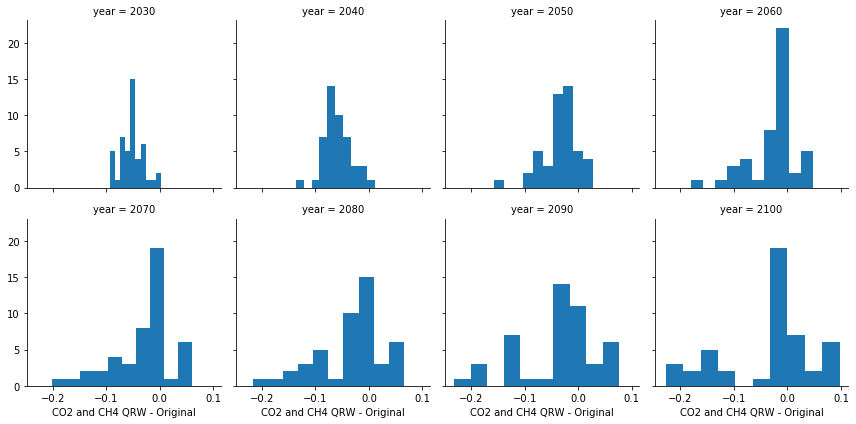

In [229]:
g = sns.FacetGrid(dif_df_full, col="year", col_wrap=4)
g = g.map(plt.hist, "CO2 and CH4 QRW - Original")

In [210]:
all_infilling.loc[("PFC|C6F14" in v for v in all_infilling.variable.values)]["value"].unique()

array([0.1422883 , 0.13352652, 0.12566773, 0.13482123, 0.12533904,
       0.1252486 , 0.14055915, 0.12414018, 0.12358313, 0.14135629,
       0.12734941, 0.14155315])

In [208]:
all_infilling.loc[("PFC|C6F14" in v for v in all_infilling.variable.values)]

,model,scenario,region,variable,unit,year,value_x,infill_x,value_y,infill_y,value,infill,CO2 EQW - Original,CO2 QRW - Original,CO2 EQW prop error,CO2 QRW prop error
19,AIM/CGE 2.1,TERL_15D_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Infilled|Emissions|PFC...,kt C6F14/yr,2030,0.142288,Original,0.142288,CO2 QRW,0.142288,CO2 EQW,0.000000,0.0,0.000000,0.0
43,AIM/CGE 2.1,TERL_15D_NoTransportPolicy,World,AR6 climate diagnostics|Infilled|Emissions|PFC...,kt C6F14/yr,2030,0.142288,Original,0.142288,CO2 QRW,0.142288,CO2 EQW,0.000000,0.0,0.000000,0.0
67,AIM/CGE 2.1,TERL_2D_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Infilled|Emissions|PFC...,kt C6F14/yr,2030,0.142288,Original,0.142288,CO2 QRW,0.142288,CO2 EQW,0.000000,0.0,0.000000,0.0
91,AIM/CGE 2.1,TERL_2D_NoTransportPolicy,World,AR6 climate diagnostics|Infilled|Emissions|PFC...,kt C6F14/yr,2030,0.137060,Original,0.137060,CO2 QRW,0.142288,CO2 EQW,0.005228,0.0,0.038143,0.0
115,AIM/CGE 2.1,TERL_Baseline_LowCarbonTransportPolicy,World,AR6 climate diagnostics|Infilled|Emissions|PFC...,kt C6F14/yr,2030,0.122789,Original,0.122789,CO2 QRW,0.142288,CO2 EQW,0.019500,0.0,0.158808,0.0
139,AIM/CGE 2.1,TERL_Baseline_NoTransportPolicy,World,AR6 climate diagnostics|Infilled|Emissions|PFC...,kt C6F14/yr,2030,0.122789,Original,0.122789,CO2 QRW,0.142288,CO2 EQW,0.019500,0.0,0.158808,0.0
163,IMAGE 3.0.1,IMA15-AGInt,World,AR6 climate diagnostics|Infilled|Emissions|PFC...,kt C6F14/yr,2030,0.142288,Original,0.142288,CO2 QRW,0.142288,CO2 EQW,0.000000,0.0,0.000000,0.0
187,IMAGE 3.0.1,IMA15-Def,World,AR6 climate diagnostics|Infilled|Emissions|PFC...,kt C6F14/yr,2030,0.142288,Original,0.142288,CO2 QRW,0.142288,CO2 EQW,0.000000,0.0,0.000000,0.0
211,IMAGE 3.0.1,IMA15-Eff,World,AR6 climate diagnostics|Infilled|Emissions|PFC...,kt C6F14/yr,2030,0.142288,Original,0.142288,CO2 QRW,0.142288,CO2 EQW,0.000000,0.0,0.000000,0.0
235,IMAGE 3.0.1,IMA15-LiStCh,World,AR6 climate diagnostics|Infilled|Emissions|PFC...,kt C6F14/yr,2030,0.142288,Original,0.142288,CO2 QRW,0.142288,CO2 EQW,0.000000,0.0,0.000000,0.0


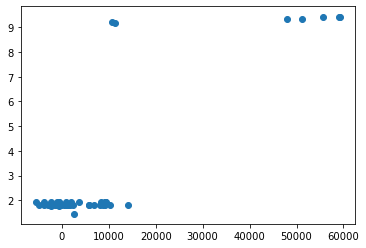

In [243]:
plt.scatter(
    all_data.data.loc[
        (all_data["variable"] == "AR6 climate diagnostics|Infilled|Emissions|CO2") & (all_data["year"] == 2050)
    ]["value"],
    all_data.data.loc[
        (all_data["variable"] == "AR6 climate diagnostics|Infilled|Emissions|SF6") & (all_data["year"] == 2050)
    ]["value"]
)

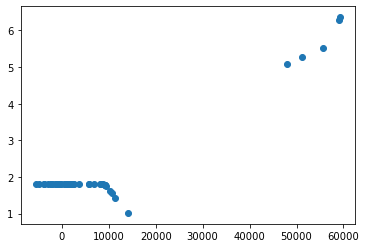

In [244]:
plt.scatter(
    infilled_qrw.data.loc[
        (infilled_qrw["variable"] == "AR6 climate diagnostics|Infilled|Emissions|CO2") & (infilled_qrw["year"] == 2050)
    ]["value"],
    infilled_qrw.data.loc[
        (infilled_qrw["variable"] == "AR6 climate diagnostics|Infilled|Emissions|SF6") & (infilled_qrw["year"] == 2050)
    ]["value"]
)

In [252]:
min(infilled_qrw.data.loc[
    (infilled_qrw["variable"] == "AR6 climate diagnostics|Infilled|Emissions|SF6") & (infilled_qrw["year"] == 2050)
]["value"])

1.006220251597297

In [251]:
min(all_data.data.loc[
    (all_data["variable"] == "AR6 climate diagnostics|Infilled|Emissions|SF6") & (all_data["year"] == 2050)
]["value"])

1.459179182248906